# Airbnb Listings in San Francisco of Year 2017

#### our notebook consists of following parts:
Part 1: introduction, including project background, objective, and data description.<br>
Part 2: shows our data cleaning and processing. <br>
Part 3: the exploantory analysis of Airbnb data.<br>
Part 4: the price prediction. <br>
Part 5: the texting mining of the customer reviews.<br>

# Part 1 Introduction

### Background:
Airbnb, a destructive innovation for the traditional hotel industry, has changed people’ experience of leasing and renting short-term lodging. The operation is successful: by now, there are 4.5 million Airbnb listings worldwide and 300+ million Airbnb guest arrivals all-time. 

Hosts list their houses or apartments on the website, and then tenants can search for and book satisfied houses or apartment on the website. During the whole process, the company does not need to own any real estate or conduct tours; it serves as abrokers which receives percentage service fees in conjunction with every booking. For the development of the company, it is of great importance to provide better support for host and at the meanwhile to attract more tenants. 


### Project objective:

1) Provide new hosts recommendation of renting price by building model and figuring out the important factors which may have significant influence on the price.
<br>
2) Explore the characteristics of multi-listers by comparing with those who are not multi-listers.
<br>
3) Conduct text analysis to the reviews of tenants to discover what they care

### Data

We select Airbnb data of San Francisco during year 2017. The data 
includes:<br>
1) listing information: cancellation_policy; require_guest_profile_picture; require_guest_phone_verification, etc. <br>
2) house information: property_type; room_type, accommodates, bathrooms, bedrooms, etc  
3) host information: host_response_time; host_response_rate(%), host_is_superhost,   host_total_listings_count, etc. <br>
4) reviews from tenants and so on. <br>

Data is obtained from Airbnb website.<br>

There are total 95 columns in the raw dataset. By identifying our project objectives, we select 52 useful variables. 


# Part 2 Data Cleaning and Processing

### Data cleaning

import all module for the following processing

In [1]:
import pandas as pd
from pandas import Series
from numpy import nan
import glob
import os
import re
import datetime as dt
%pylab inline
import requests, re
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
import nltk
import string, itertools
from collections import Counter, defaultdict
from nltk.text import Text
from nltk.probability import FreqDist
from nltk.tokenize import word_tokenize, sent_tokenize, regexp_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from wordcloud import WordCloud
from gensim.corpora.dictionary import Dictionary
from gensim.models.tfidfmodel import TfidfModel
from sklearn.cluster import KMeans
import dask.dataframe as dd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

Populating the interactive namespace from numpy and matplotlib


C:\Users\Kathe\Anaconda3\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


1.Since the raw dataset we collect is monthly data obtained from Airbnb, the first step we did is to read and concatenate 12-month listing data into one dataframe for San Francisco and drop the columns that we do not need after careful consideration and analysis of each column.<br>

In [7]:
df=pd.read_csv('D:/Ying/University of Maryland/study/2nd semester/term A/BUDT758X Data processing and analysis in python/project/listings-2.csv')

# drop columns of San Francisco dataframe we don't need in this project
path = r'D:/Ying/University of Maryland/study/2nd semester/term A/BUDT758X Data processing and analysis in python/project/data/SF/listings'                     
listings_sf = glob.glob(os.path.join(path, "*.csv"))  
df_sf = (pd.read_csv(f) for f in listings_sf)
sf = pd.concat(df_sf).reindex_axis(df.columns, axis=1)
sf.drop(['summary','interaction','zipcode' ,'listing_url','scrape_id','space','description','experiences_offered','notes','thumbnail_url','medium_url','picture_url','xl_picture_url','host_url','host_name','host_location','host_neighbourhood','host_about','host_acceptance_rate','host_thumbnail_url','host_picture_url','host_listings_count','host_verifications','street','neighbourhood','city','market','smart_location','country_code','country','is_location_exact','latitude','longitude','weekly_price','monthly_price','guests_included','calendar_updated','has_availability','availability_30','availability_60','availability_90','availability_365','calendar_last_scraped','first_review','last_review','license','jurisdiction_names','calculated_host_listings_count'], axis=1, inplace=True)
sf.shape

C:\Users\Kathe\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (43) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\Kathe\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DtypeWarning: Columns (43) have mixed types. Specify dtype option on import or set low_memory=False.
  import sys
C:\Users\Kathe\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  import sys


(104050, 47)

In [7]:
sf.index=range(104050)
sf.tail()

,id,name,neighborhood_overview,transit,access,house_rules,host_id,host_since,host_response_time,host_response_rate,...,review_scores_location,review_scores_value,requires_license,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,reviews_per_month,scraped_year,scraped_month
104045,6272183,Cozy Studio by Golden Gate Park,NaN,NaN,NaN,Thank you in advance for respecting our house ...,32300861,2015-04-30,within an hour,100%,...,10.0,9.0,t,t,strict,f,f,2.53,2017,9
104046,905902,Elegant Family Flat on GG Park,"NEIGHBORHOOD The Sunset is a safe, family frie...",TRANSPORTATION Near 4 major MUNI (bus/light ra...,The flat and attached deck.,No smoking in the flat No moving furniture No ...,1540675,2011-12-27,within a day,100%,...,9.0,9.0,t,f,strict,t,t,0.70,2017,9
104047,2694526,Beach Retreat @Golden Gate Park,THE NEIGHBORHOOD The Inner Richmond is a charm...,TRANSPORTATION There are numerous bus lines w...,HOUSEHOLD Guests will have access to all commo...,Must be okay with sharing the bathroom with ro...,10829039,2013-12-26,within an hour,100%,...,10.0,9.0,t,t,strict,f,f,2.71,2017,9
104048,254953,Monthly Discounts-Luxury OCEANFRONT City Living,Fabulous Oceanfront location next to Golden Ga...,Bus line outside the front door for convenienc...,Guests must have access by Luxury Living,"no smoking , no pets please thank you for abid...",1339470,2011-10-26,within an hour,100%,...,10.0,10.0,t,f,strict,f,f,0.06,2017,9
104049,2397858,Modern Light Airy House by GG Park/Beach w/par...,Sleepy local safe seaside residential area whe...,Transportation is easy without a car. Public T...,Have easy access to keyless/key 4 bedroom 3 b...,Thanks in advance for respecting house rules. ...,12062895,2014-02-08,within an hour,100%,...,9.0,9.0,t,f,strict,f,f,0.54,2017,9


2.Based on the number of null in each column, we make another column and observation selection

In [202]:
sf.isnull().sum()

id                                       0
name                                    25
neighborhood_overview                41337
transit                              38464
access                               39762
house_rules                          33788
host_id                                  0
host_since                             111
host_response_time                   30851
host_response_rate                   30851
host_is_superhost                      111
host_total_listings_count              111
host_has_profile_pic                   111
host_identity_verified                 111
neighbourhood_group_cleansed        104050
state                                    0
property_type                            0
room_type                                0
accommodates                             0
bathrooms                              414
bedrooms                                84
beds                                   182
bed_type                                 0
amenities  

In [ ]:
sf.drop(['neighborhood_overview', 'transit','square_feet','neighbourhood_group_cleansed'], axis=1, inplace=True)
sf=sf.dropna(axis=0,subset=['review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_checkin','review_scores_communication','review_scores_location','review_scores_value'])

3.Replace all possible null value representation with 'nan' and replace null value in columns with mean value, zero, most common case or drop columns with null value after evaluating the characteristic of each of these columns.<br>

In [9]:
def null(x):
    if x=='NA':
        return nan
    elif x=='':
        return nan
    elif x=='-':
        return nan
    elif x=='--':
        return nan
    elif x=='\\N':
        return nan
    elif x=='\s*':
        return nan
    elif x=='N/A':
        return nan
    else:
        return x
    
sf=sf.applymap(null)

a. Replace n/a in column with 0

In [19]:
sf['security_deposit'].fillna(0, inplace=True)
sf['security_deposit']=sf['security_deposit'].map(lambda x: str(x).strip('$').replace(',','')).astype(float)

In [ ]:
sf['host_total_listings_count'].replace(nan,0, inplace=True)
sf['host_total_listings_count'].astype(int)
sf.head()

In [ ]:
sf['host_has_profile_pic'].replace(nan,0,inplace=True)
sf['host_has_profile_pic']=sf['host_has_profile_pic'].map(lambda x: str(x))

In [ ]:
sf['host_is_superhost'].fillna(0, inplace=True)
sf['host_is_superhost']=sf['host_is_superhost'].map(lambda x:str(x))

In [ ]:
sf['host_identity_verified'].replace(nan,0,inplace=True)
sf['host_identity_verified']=sf['host_identity_verified'].map(lambda x: str(x))

In [ ]:
sf['cleaning_fee'].fillna(0 , inplace=True)

In [ ]:
sf['reviews_per_month'].fillna(0, inplace=True)
sf['reviews_per_month']=sf['reviews_per_month'].map(lambda x: int(x))

b. Replace nan in column with the column's mean value

In [20]:
bathroom_t=Series([int(num) for num in sf['bathrooms'].dropna()])
mean_bathrooms_sf = bathroom_t.mean()
sf['bathrooms'].fillna(mean_bathrooms_sf , inplace=True)
sf['bathrooms']=sf['bathrooms'].astype(int)

In [ ]:
bedrooms_t=Series([int(num) for num in sf['bedrooms'].dropna()])
mean_bedrooms_sf = bedrooms_t.mean()
sf['bedrooms'].fillna(mean_bedrooms_sf , inplace=True)
sf['bedrooms']=sf['bedrooms'].astype(int)

In [ ]:
beds_t=Series([int(num) for num in sf['beds'].dropna()])
mean_beds_sf = beds_t.mean()
sf['beds'].fillna(mean_bedrooms_sf , inplace=True)
sf['beds']=sf['beds'].astype(int)

c. Fill nan with specific number based on the business idea

In [ ]:
# replace n/a in column 'host_response_rate' with 100, because n/a means there is no question has been asked so there is no answer
sf=sf.replace('[%]','',regex=True)
sf.rename(columns={'host_response_rate':'host_response_rate(%)'}, inplace=True)
sf['host_response_rate(%)'].fillna(100, inplace=True)
sf['host_response_rate(%)']=sf['host_response_rate(%)'].map(lambda x: int(x))
sf.head()

4.Extract year and month information by separating date.

In [ ]:
sf['scraped_year']= sf['last_scraped'].map(lambda x: dt.datetime.strptime(str(x).strip(), '%Y-%m-%d').year)
sf['scraped_month']= sf['last_scraped'].map(lambda x: dt.datetime.strptime(str(x).strip(), '%Y-%m-%d').month)
sf.drop('last_scraped', axis=1, inplace=True)

5.Some variable are set to be categorical variable to facilitate modeling part. 'access' is one of the example.

Column “access” is set to be dummy variable.  If column 'access' contains word 'full' or null value, then value of column 'access' is 1, else 0.<br>

In [12]:
sf['access']=sf['access'].astype(str)
sf.loc[(sf['access'].str.contains('full',na=False))| (sf['access']=='NaN'), 'access'] = 1
sf.loc[sf['access']!=1, 'access'] = 0

6.For column “house_rules”, we select rows containing-smoking, party, pet, guest with the help of package ‘Re’ and set them to dummy variables. If house_rules column mention “smoking”, then the value is set to 1; if mention ‘’party”, then the value is set to be 2; if mention “pet”, then the value is set to be 3; if mention “guest”, then the value is set to be 4; if else, value is set to be 0.<br>

In [ ]:
sf.loc[sf['house_rules'].str.contains('[smoke|smoking|SMOKE|SMOKING]',na=False), 'house_rules'] = 1
sf.loc[sf['house_rules'].str.contains('[party|parties|PARTY|PARTIES]',na=False), 'house_rules'] = 2
sf.loc[sf['house_rules'].str.contains('[pet|pets|PET|PETS]',na=False), 'house_rules'] = 3
sf.loc[sf['house_rules'].str.contains('[guest|guests|GUEST|GUESTS]',na=False), 'house_rules'] = 4
sf.loc[sf['access']!=1|2|3|4, 'house_rules'] = 0

7.Convert the column value which are “f” or “t” to 0 and 1, such as column “super_host”, “host_identity_verified” and so on.<br>
For those nan, we replace them with 0 which means 'f' based on the way of host thinking.

In [ ]:
sf['host_is_superhost'].replace('f',0, inplace=True)
sf['host_is_superhost'].replace('t',1, inplace=True)
sf['host_is_superhost']= sf['host_is_superhost'].astype(int)

In [ ]:
sf['host_has_profile_pic'].replace('f', 0, inplace=True)
sf['host_has_profile_pic'].replace('t', 1, inplace=True)
sf['host_has_profile_pic']=sf['host_has_profile_pic'].astype(int)

In [ ]:
sf['host_identity_verified'].replace('f', 0, inplace=True)
sf['host_identity_verified'].replace('t', 1, inplace=True)
sf['host_identity_verified']=sf['host_identity_verified'].astype(int)

In [ ]:
sf['requires_license'].replace('f',0, inplace=True)
sf['requires_license'].replace('t',1, inplace=True)
sf['requires_license']=sf['requires_license'].astype(int)

In [ ]:
sf['instant_bookable'].replace('f',0, inplace=True)
sf['instant_bookable'].replace('t',1, inplace=True)
sf['instant_bookable']=sf['instant_bookable'].astype(int)

In [ ]:
sf['require_guest_profile_picture'].replace('f',0, inplace=True)
sf['require_guest_profile_picture'].replace('t',1, inplace=True)
sf['require_guest_profile_picture']=sf['require_guest_profile_picture'].astype(int)

In [ ]:
sf['require_guest_phone_verification'].replace('f',0, inplace=True)
sf['require_guest_phone_verification'].replace('t',1, inplace=True)
sf['require_guest_phone_verification']=sf['require_guest_phone_verification'].astype(int)

8.According to the sequence of each categorical column's catogories, we replace the nan with 'unknown' or 'other' categorical string and convert the column value which are string to numbers in order, eg, room_type, host response time.

In [ ]:
sf['host_response_time'].fillna('unknown', inplace=True)
sf['host_response_time']=sf['host_response_time'].map(lambda x : str(x))
sf['host_response_time'].replace('within an hour',0, inplace=True)
sf['host_response_time'].replace('within a few hours',1, inplace=True)
sf['host_response_time'].replace('within a day',2, inplace=True)
sf['host_response_time'].replace('a few days or more',3, inplace=True)
sf['host_response_time'].replace('unknown',4, inplace=True)

In [ ]:
sf['room_type'].replace('Shared room',0, inplace=True)
sf['room_type'].replace('Private room',1, inplace=True)
sf['room_type'].replace('Entire home/apt',2, inplace=True)

9.Convert the datatype of each columns to the ones it should be. For example, convert the datatype of column square_feet into float.

In [23]:
sf['cleaning_fee']=sf['cleaning_fee'].map(lambda x: str(x).strip('$').replace(',',''))
sf['cleaning_fee']=sf['cleaning_fee'].astype(float)

sf['accommodates']=sf['accommodates'].astype(int)

sf['price']=sf['price'].map(lambda x: str(x).strip('$').replace(',',''))
sf['price']=sf['price'].astype(float)

sf['extra_people']=sf['extra_people'].map(lambda x: str(x).strip('$').replace(',',''))
sf['extra_people']=sf['extra_people'].astype(float)

sf['minimum_nights']=sf['minimum_nights'].map(lambda x: int(x))
sf['maximum_nights']=sf['maximum_nights'].map(lambda x: int(x))

sf = sf.dropna(axis=0,subset=['host_since'])
sf['host_since']= sf['host_since'].map(lambda x: dt.datetime.strptime(str(x).strip(), '%Y-%m-%d'))

10.Use the column value to filter out unusable observation, eg, state(because we are going to analyze the listings in San Francisco, California,  so we remove listings which not in there)

In [20]:
print(sf['state'].unique())
sf = sf[sf['state']=='CA']

['CA' 'IL']


11.To have better performance on prediction and analysis, we combine some categories into one, eg, property_type.

In [21]:
#check types of property
print(sf['property_type'].unique())

['House' 'Apartment' 'Condominium' 'Bungalow' 'Bed & Breakfast'
 'Townhouse' 'Other' 'Cabin' 'Guesthouse' 'Dorm' 'Loft' 'Hostel'
 'Boutique hotel' 'Camper/RV' 'Treehouse' 'Cave' 'Castle' 'Boat'
 'Timeshare' 'Lighthouse' 'In-law' 'Guest suite' 'Serviced apartment'
 'Tent' 'Villa' 'Tipi' 'Casa particular']


In [ ]:
sf['property_type']=sf['property_type'].str.replace('Bed & Breakfast','Other')
sf['property_type']=sf['property_type'].str.replace('In-law','Other')
sf['property_type']=sf['property_type'].str.replace('Pension (Korea)','Other')
sf['property_type']=sf['property_type'].str.replace('Tipi','Tent')
sf['property_type']=sf['property_type'].str.replace('Yurt','Tent')

12.Transform text into useful variables. For example, after spliting the text into phrases and observing the unique value, filter out those irrelevent value then count them (amenity)

In [ ]:
#extract amenitise and filter out the irrelevant value in column 
amenities_sf=list()
i=0
for listing in sf['amenities']:
    listing=listing.split(',')
    listing=[i.strip(string.punctuation).strip() for i in listing]
    for item in listing:
        amenities_sf.append(item)
        
amenities_sf=set(amenities_sf)

amenity_len = list()
for listing in sf['amenities']:
    listing=listing.split(',')
    listing=[i.strip(string.punctuation).strip() for i in listing]
    for item in listing:
        if item == ''or'24-hour check-in'or'Self Check-In'or'Cleaning before checkout'or'Smoking allowed'or'Host greets you'or'Long term stays allowed'or'translation missing: en.hosting_amenity_49'or'translation missing: en.hosting_amenity_50':
            del(item)
    amenity_len.append(len(listing))

sf['amenities']=Series(amenity_len)
sf['amenities'].fillna(0, inplace=True)
sf['amenities'].head()

### Merge listings dataframe and Review dataframe

In [ ]:
sf_merge= dd.merge(sf, r_sf,left_on='id', right_on='listing_id', how='inner')
sf_merge=sf_merge.dropna(axis=0, how='any')

In [284]:
sf_merge.shape

(13133104, 52)

# Part 3 Explonatory Analysis

### Price trend

Text(0.5,1,'Price Trend in 12 months')

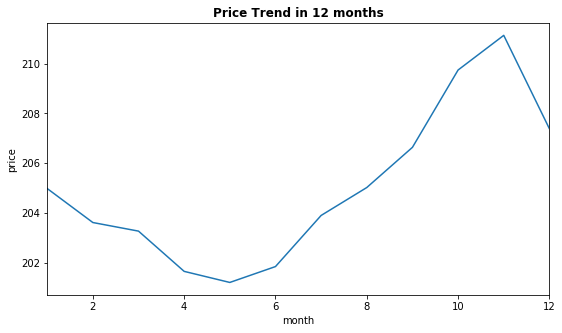

In [142]:
sf.groupby(by=['scraped_month'])['price'].mean().plot(figsize=(9,5),rot=0)
plt.xlabel('month')
plt.ylabel('price')
plt.title('Price Trend in 12 months',fontweight='bold',fontsize=12)

From the trend, we can find that the price of average lisitng in San Francisco is higher in winter than in other season bacause peole tend to go to California to spend their winter. If visitors want to get lower price of housing in San Fransico, they should avoid winter.

### Room information and Price

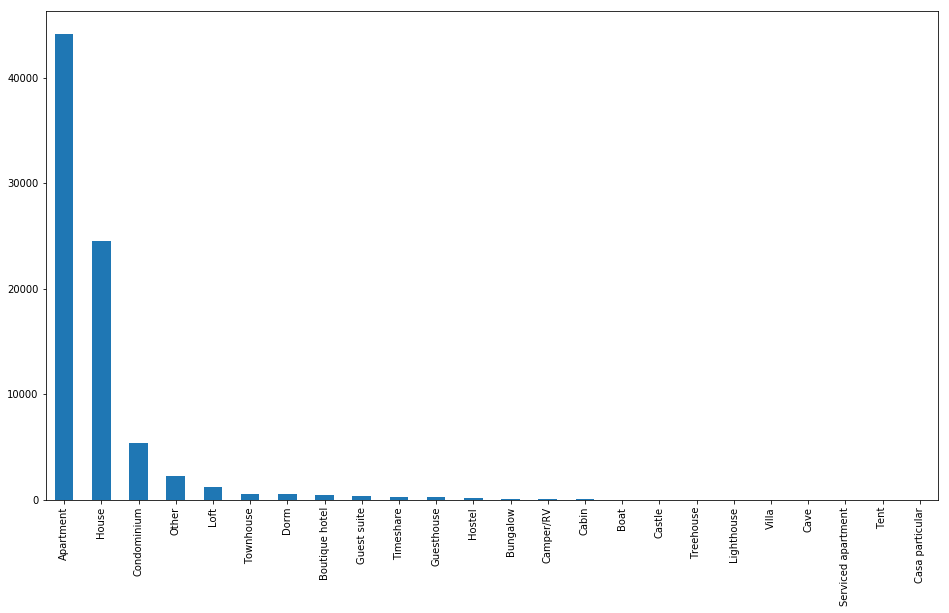

In [143]:
sf['property_type'].value_counts().plot('bar',figsize=(16,9))

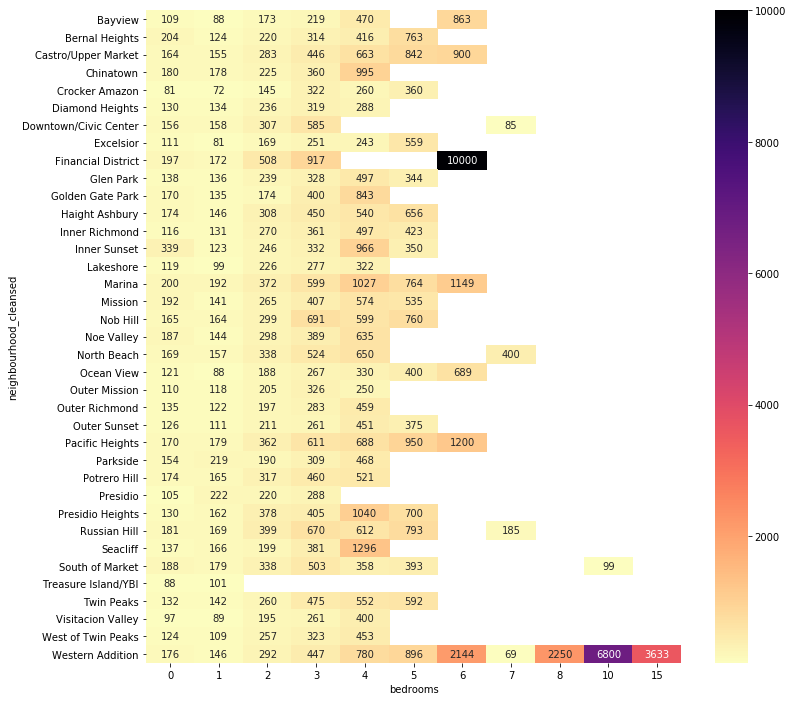

In [144]:
plt.figure(figsize=(12,12))
sns.heatmap(sf.groupby(['neighbourhood_cleansed', 'bedrooms']).price.mean().unstack(),cmap='magma_r', annot=True, fmt=".0f")

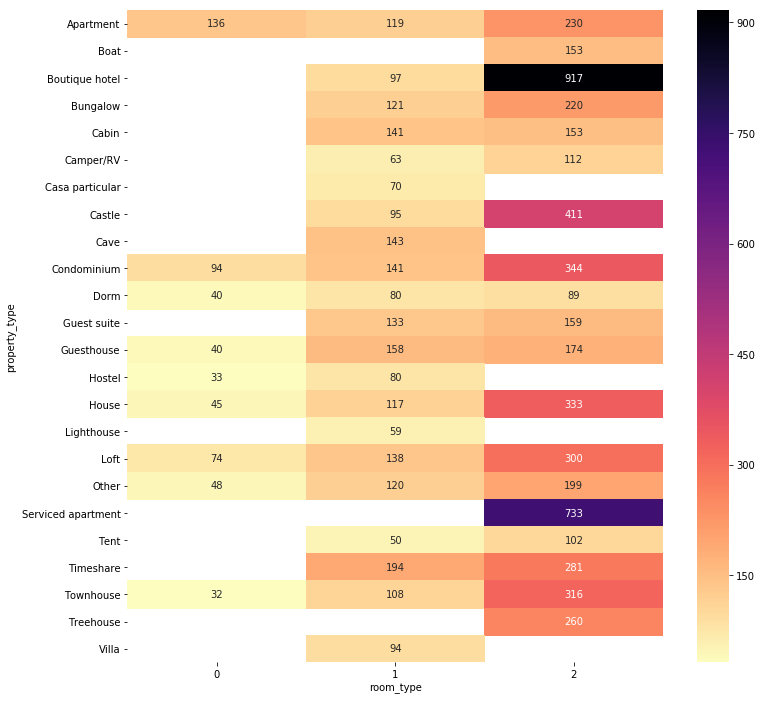

In [293]:
plt.figure(figsize=(12,12))
sns.heatmap(sf.groupby(['property_type', 'room_type']).price.mean().unstack(),cmap='magma_r', annot=True, fmt=".0f")

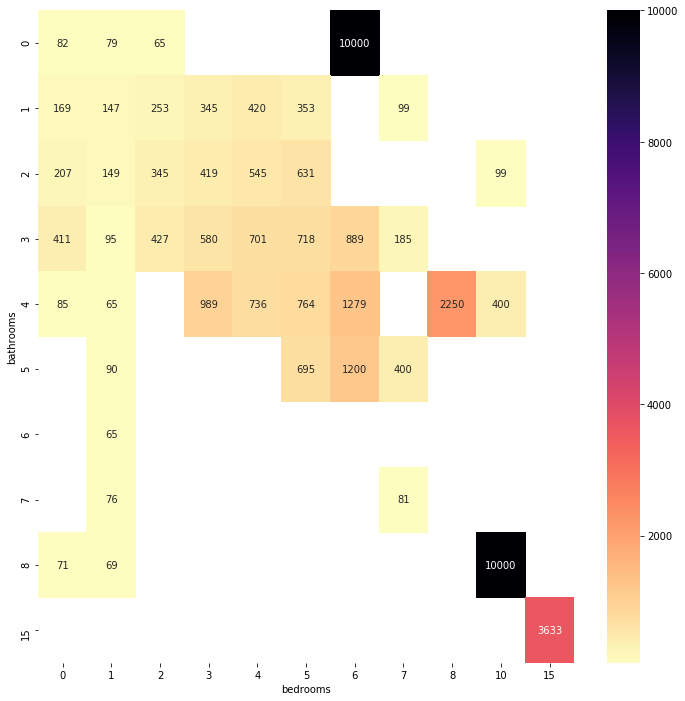

In [306]:
plt.figure(figsize=(12,12))
sns.heatmap(sf.groupby(['bathrooms', 'bedrooms']).price.mean().unstack(),cmap='magma_r', annot=True, fmt=".0f")

Most of the listings in sf is apartment and house following.The heatmap shows that all the listings' prices broken down by property type and room type, which provides us a much better understanding of the price breakdown in San Fransico based on property and room types. We can know that for almost all property type, prices for Entire home/apartment(room_type=2) are highest. Thus,property type and room type plays a very important role in deciding price of a listing. In addition, we can know that bedrooms numbers have more significant influence on price than bathrooms. To explore more about the features and price, we build models to predict price in following sections.

### Multi-listers

Muli-lister means host who have more than 2 listings in Airbnb. For Airbb, muliti-lister is of great importance. More booking will occurs with multi-listers, so they can get more service fees from mluti-listers. In this analysis, we do some analysis of multi-lister by comparing with those who are not multi-listers. 

In [146]:
sf['host_total_listings_count'].max()

496.0

In [147]:
sf_host=sf_merge.drop_duplicates(subset=['host_id'], keep='first')

In [148]:
sf_host['host_is_multi-lister']= sf_host['host_total_listings_count'].apply(lambda x: 1 if x>1 else 0)

/Users/macintoshhd/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [149]:
sf_host['host_is_multi-lister'].value_counts()

0    6247
1    1786
Name: host_is_multi-lister, dtype: int64

Text(0,0.5,'counts')

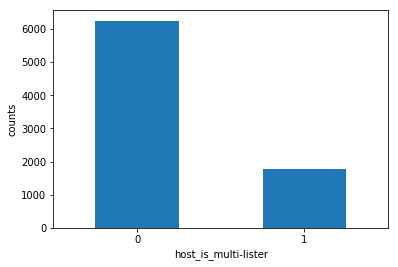

In [150]:
sf_host['host_is_multi-lister'].value_counts().plot(kind='bar',rot=0)
plt.xlabel('host_is_multi-lister')
plt.ylabel('counts')

In [151]:
sf_multi=sf_host[sf_host['host_is_multi-lister']==1]
sf_multi['host_total_listings_count'].value_counts(normalize=True).head()

2.0    0.604703
3.0    0.186450
4.0    0.070549
5.0    0.043673
6.0    0.021277
Name: host_total_listings_count, dtype: float64

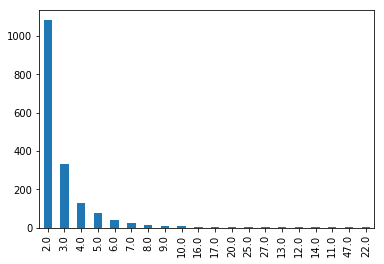

In [152]:
sf_multi['host_total_listings_count'].value_counts().head(20).plot('bar')

There are less multi-listers in SF. 60.47% of multi-listers have 2 rooms for listing. The maximum lisitngs number of multi-lister is 496.0.

#### 1.Multi-lister & superhost

Since data are 12-month data from San Fransico, we need to drop duplicate data to get accurate analysing result. In order to get the percentage of superhost of multi-listers, we need to drop duplicate multi-lister.

In [153]:
pd.crosstab(index=sf_host['host_is_superhost'], columns=sf_host['host_is_multi-lister'])

host_is_multi-lister,0,1
host_is_superhost,,
0,5271,1332
1,976,454


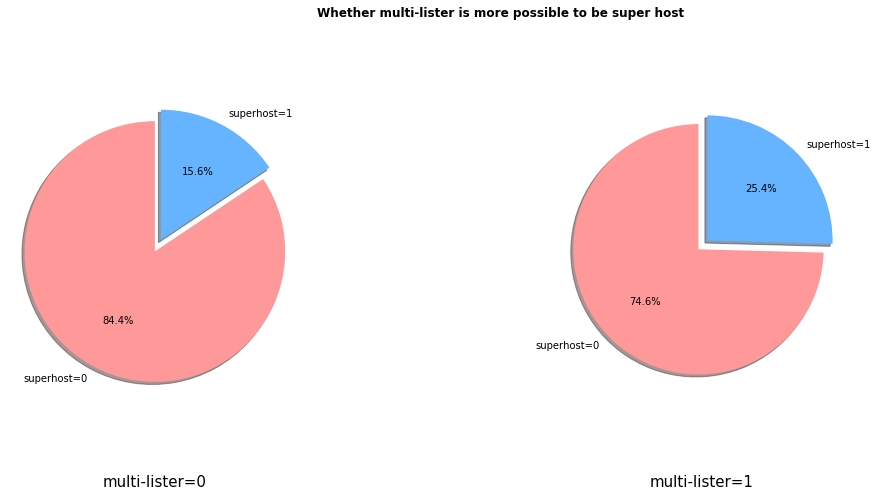

In [154]:
# multi-lister=0
# Pie chart
fig=plt.figure(figsize=(12,7))
ax1 = plt.subplot(121)
ax2 = plt.subplot(122)
plt.title('Whether multi-lister is more possible to be super host',fontweight='bold', x=-0.2,fontsize=12)

labels = ['superhost=0', 'superhost=1']
sizes = [5271, 976]
explode = (0, 0.1)
colors = ['#ff9999','#66b3ff']
ax1.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
ax1.set_xlabel('multi-lister=0',fontsize=15)

# multi-lister=1
labels = ['superhost=0', 'superhost=1']
sizes1 = [1332, 454]
explode = (0, 0.1)
colors = ['#ff9999','#66b3ff']
ax2.pie(sizes1, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax2.set_xlabel('multi-lister=1',fontsize=15)
ax2.axis('equal')

plt.tight_layout()
plt.show()

From the pie chart, we can know that multi-listers are more plikely to be superhost than those whoa are not multi-listers

#### 2.  Multi-lister & Reviews

In [155]:
scores=sf_host.groupby(by=['host_is_multi-lister'])['review_scores_rating'].mean()
scores

host_is_multi-lister
0    95.184569
1    94.277716
Name: review_scores_rating, dtype: float64

Text(0.5,1,'Multi-lister & Review Score')

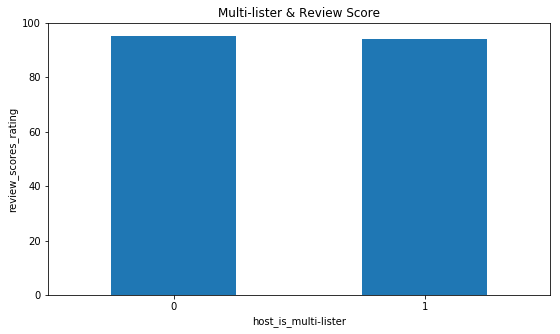

In [156]:
sf_host.groupby(by=['host_is_multi-lister'])['review_scores_rating'].mean().plot(kind='bar', figsize=(9,5),rot=0)
plt.xlabel('host_is_multi-lister')
plt.ylabel('review_scores_rating')
plt.title('Multi-lister & Review Score')

From the plot, we can know that multi-lister have slight lower review score than those who are not multi-listers.

#### 3.  Multi-lister & Price

Text(0.5,1,'Multi-lister & Price')

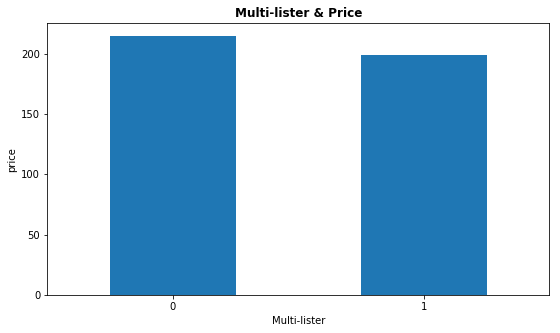

In [157]:
sf_host.groupby(by=['host_is_multi-lister'])['price'].mean().plot(kind='bar',figsize=(9,5),rot=0)
plt.xlabel('Multi-lister')
plt.ylabel('price')
plt.title('Multi-lister & Price',fontweight='bold',fontsize=12)

From the plot, we can know that multi-lister have slight lower price than those who are not multi-listers.

# Part 4  Modelling

### Data preparing:
1.Extract useful columns for modelling

In [ ]:
sf_price = sf[['access','house_rules','host_response_time','host_response_rate(%)','host_is_superhost','host_total_listings_count','host_has_profile_pic','host_identity_verified','property_type','room_type','accommodates','bathrooms','bedrooms','beds','bed_type','amenities','security_deposit','cleaning_fee','extra_people','minimum_nights','maximum_nights','number_of_reviews','review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_checkin','review_scores_communication','review_scores_location','review_scores_value','requires_license','instant_bookable','cancellation_policy','require_guest_profile_picture','require_guest_phone_verification','reviews_per_month','scraped_month']]

2.Change specific columns into categorical variables

In [ ]:
sf_price['access']= sf_price['access'].astype('category')
sf_price['house_rules']= sf_price['house_rules'].astype('category')
sf_price['host_response_time']= sf_price['host_response_time'].astype('category')
sf_price['host_is_superhost']= sf_price['host_is_superhost'].astype('category')
sf_price['host_has_profile_pic']= sf_price['host_has_profile_pic'].astype('category')
sf_price['host_identity_verified']= sf_price['host_identity_verified'].astype('category')
sf_price['room_type']= sf_price['room_type'].astype('category')
sf_price['requires_license']= sf_price['requires_license'].astype('category')
sf_price['instant_bookable']= sf_price['instant_bookable'].astype('category')
sf_price['require_guest_profile_picture']= sf_price['require_guest_profile_picture'].astype('category')
sf_price['require_guest_phone_verification']= sf_price['require_guest_phone_verification'].astype('category')

3.Get dummies variables, eg, property type, bed type, cancellation policy and so on

In [ ]:
ptype_dummies = pd.get_dummies(sf_price['property_type'])
ptype_dummies.applymap(np.int)
step_1 = pd.concat([sf_price, ptype_dummies], axis=1)      
step_1.drop(['property_type', 'Other'], inplace=True, axis=1)

In [ ]:
bedtype_dummies = pd.get_dummies(sf_price['bed_type'])
bedtype_dummies.applymap(np.int)
step_2 = pd.concat([step_1, bedtype_dummies], axis=1)    
step_2.drop(['bed_type','Couch' ], inplace=True, axis=1)

In [ ]:
cp_dummies = pd.get_dummies(sf_price['cancellation_policy'])
cp_dummies.applymap(np.int)
step_3 = pd.concat([step_2, cp_dummies], axis=1)    
step_3.drop(['cancellation_policy','flexible' ], inplace=True, axis=1)

4.Check the correalation between all variables in step_3 (x variables)

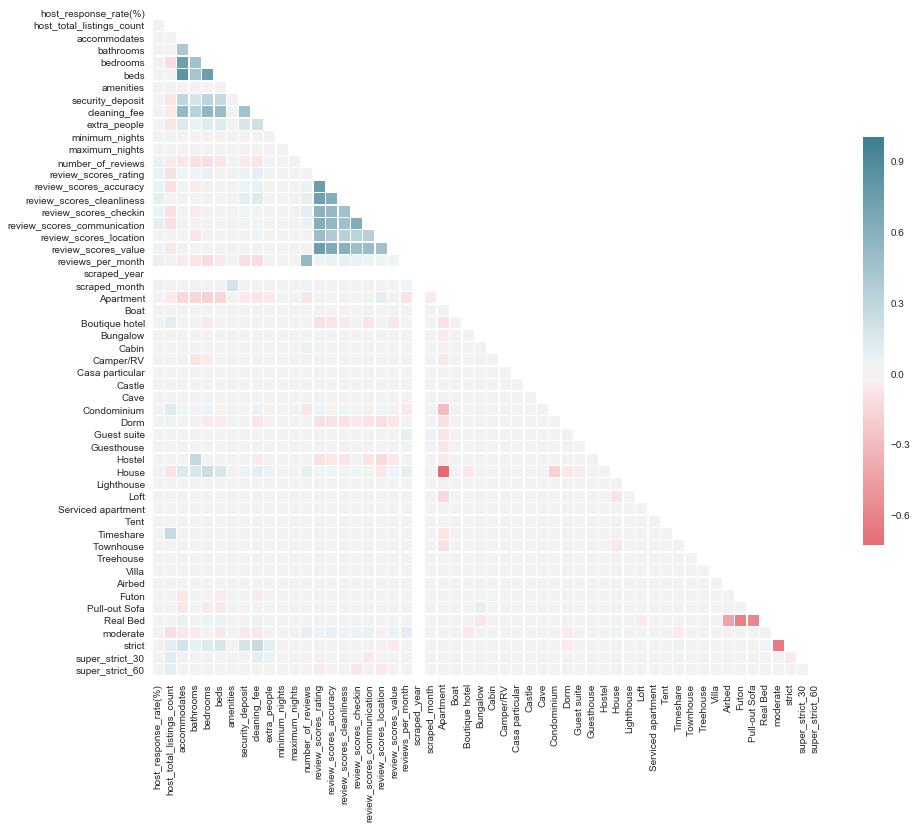

In [249]:
sns.set(style="white")

corr = step_3.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(15, 15))

cmap = sns.diverging_palette(10, 220, as_cmap=True)

sns.heatmap(corr,mask = mask, cmap=cmap, center=0,
            square=True,linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

As the definition, when the absolute correlation value of two variables is higher than 0.8, then these two variables are correlated. So based on the graph above, these groups of variables are highly correlated: accommodates and bedrooms,  accommodates and bed, the review scores. Because So we remove the variables: bedrooms, review_scores_accuracy, review_scores_cleanliness, review_scores_value. 

In [ ]:
sf_price.drop(['accommodates','review_scores_accuracy','review_scores_cleanliness', 'review_scores_value'],axis=1, inplace=True)
p = np.array(sf['price'])
sf_price['price']=p

5.Transform columns' values into x and y, split the data set into training, validation and testing, and scale the x variables

In [ ]:
X = sf_price.iloc [:,0:-1].values
y = sf_price.iloc[ :, 61].values

X_rest, X_test, y_rest, y_test = train_test_split(X, y, test_size = .1, random_state = 0)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = .25, random_state = 0) 

sc = StandardScaler()
sc.fit(X_train)
X_train = sc.transform(X_train)
X_val = sc.transform(X_val)
X_test = sc.transform(X_test)

### Building model:

#### 1.linear regression

In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train)

#calculate the rmse on validation dataset
y_vpred_linear = lr.predict(X_val)
linear_rmse = np.sqrt(mean_squared_error(y_val,y_vpred_linear))

In [258]:
#apply on testing data
y_tpred_linear = lr.predict(X_test)
linear_rmse_test = np.sqrt(mean_squared_error(y_test,y_tpred_linear))
linear_rmse_test

252.9663011682556

#### 2.Lasso model

In [260]:
lasso_model = Lasso(alpha=0.1)

alphas = np.logspace(-4, 4, 30)

tuned_parameters = [{'alpha': alphas}]
n_folds = 10

CV_lasso = GridSearchCV(lasso_model, tuned_parameters, cv=n_folds, refit=True,scoring='neg_mean_squared_error',)
CV_lasso.fit(X_rest, y_rest)

GridSearchCV(cv=10, error_score='raise',
       estimator=Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'alpha': array([1.00000e-04, 1.88739e-04, 3.56225e-04, 6.72336e-04, 1.26896e-03,
       2.39503e-03, 4.52035e-03, 8.53168e-03, 1.61026e-02, 3.03920e-02,
       5.73615e-02, 1.08264e-01, 2.04336e-01, 3.85662e-01, 7.27895e-01,
       1.37382e+00, 2.59294e+00, 4.89390e+00, 9.23671e+00, 1.74333e+01,
       3.29034e+01, 6.21017e+01, 1.17210e+02, 2.21222e+02, 4.17532e+02,
       7.88046e+02, 1.48735e+03, 2.80722e+03, 5.29832e+03, 1.00000e+04])}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [261]:
#minimum average RMSE on validation dataset
lassov = sqrt(CV_lasso.best_score_*-1)
lassov

219.739368219543

In [263]:
#apply on testing data
y_tpred_lassob = CV_lasso.predict(X_test)
lassob_rmse_test = np.sqrt(mean_squared_error(y_test,y_tpred_lassob))
lassob_rmse_test

292.8737132149961

#### 3.Regression Tree

In [265]:
tree_model = DecisionTreeRegressor()
params = {'min_samples_split': [5,10,25,50], 'max_depth': [5,10,25]}

rt_grid = GridSearchCV(tree_model, param_grid=params, refit=True, scoring='neg_mean_squared_error', cv=n_folds)
rt_grid.fit(X_rest, y_rest)

GridSearchCV(cv=10, error_score='raise',
       estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'min_samples_split': [5, 10, 25, 50], 'max_depth': [5, 10, 25]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [269]:
#average RMSE on validation dataset
rfv = sqrt(rt_grid.best_score_*-1)
rfv

141.96678147279817

In [270]:
#calculate rmse on testing dataset
y_tpred_rtb=rt_grid.predict(X_test)
rtb_rmse_test = np.sqrt(mean_squared_error(y_test,y_tpred_rtb))
rtb_rmse_test

292.4503117102658

#### 4.Random Forest

In [102]:
param_grid = { 
    'n_estimators': range(100,501,100),
    'max_features': range(5,14)
}

CV_rfr = GridSearchCV(estimator=rf_model, param_grid=param_grid)
CV_rfr.fit(X_train, y_train)

#RMSE on validation dataset
rfv = sqrt(CV_rfr.best_score_*-1)
rfv

185.75182679845983

In [105]:
CV_rfr.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=13, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=200, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [122]:
#Applying the best parameters to build best random forest
rfb_model = RandomForestRegressor( max_features=13, n_estimators=200)
rfb_model.fit(X_train, y_train)
y_vpred_rf = CV_rfr.predict(X_val)
rf_rmse = np.sqrt(mean_squared_error(y_val,y_vpred_rf))
rf_rmse

185.75182679845983

In [171]:
#RMSE on testing data
y_tpred_rf = CV_rfr.predict(X_test)
rf_rmse_test = np.sqrt(mean_squared_error(y_test,y_tpred_rf))
rf_rmse_test

129.13345929088675

Compared all rmse getting from different model on testing dataset, random forest model offers the best prediction. 

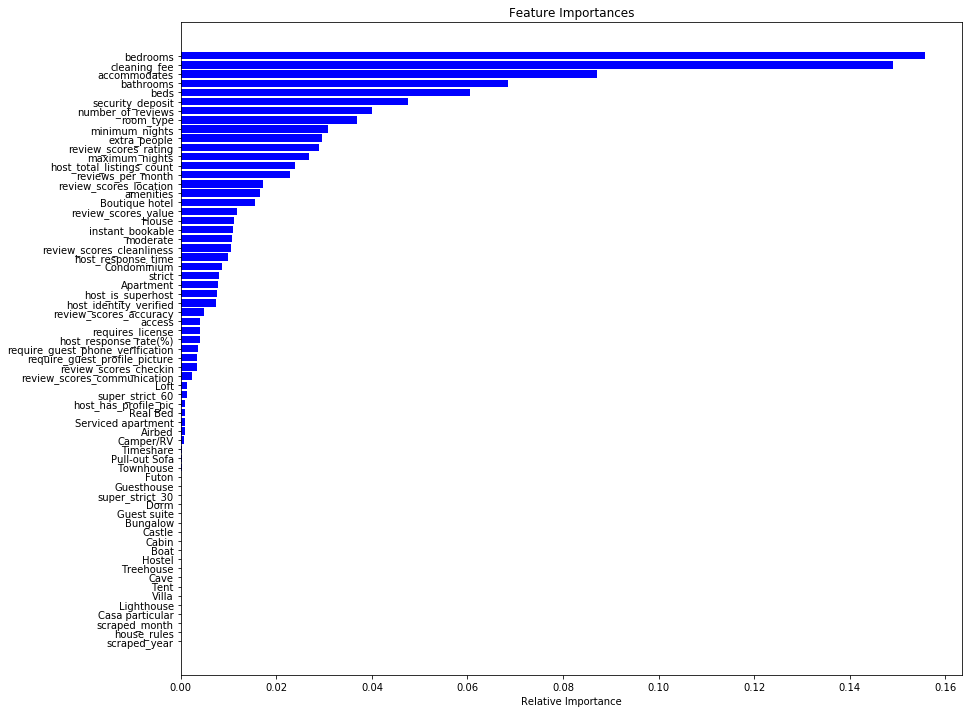

In [143]:
features = sf_price.columns
importances = rfb_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(14,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')
plt.show()

### Recommendations

And after interpreting the result, we found that the number of bedrooms and bathrooms and the amount of cleaning fee seems to have significant influence on listing's price. So, we recommand host be careful the number of bedrooms and bathrooms and the amount of cleaning fee when they decide to have competitive listings' price. 

# Part 5 Text Mining

Customer review always can help business know more about what their customers think and care so that it can know how to improve their product and even discover new opportunities. Thus, conducting text mining is very conductive. In this analysis, we perform text mining in order to know what tenant care most of listing and advice host to pay more attention on those requirement to increase the satisfation of both parties. 

Becasue of huge data volume, we have to use only part of the dataset to do text mining. From the distribution graph of rating scores, we can know that high rating scores account for significant proportion of total rating scores.

Based on the rating scores distribution, we decide to use the listings with high rating scores and low rating scores to do text mining to discover what customer care about the listings. <br>

High rating scores in this analysis means: rating scores=100 <br>
Low rating scores in this analysis means: rating scores <85

Text(0.5,1,'review scores rating distribution')

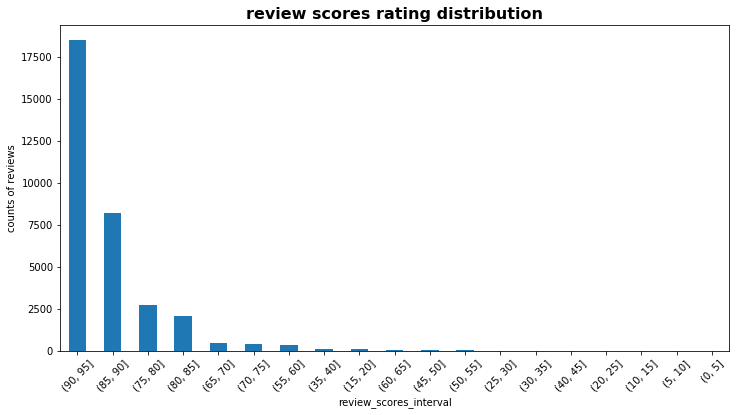

In [307]:
# review score of sf
sf['review_scores_interval'].value_counts().plot('bar',figsize=(12,6),rot=45,)
plt.xlabel('review_scores_interval')
plt.ylabel('counts of reviews')
plt.title('review scores rating distribution',fontsize=16,fontweight='bold')

In [308]:
sf_merge['review_scores_rating'].value_counts()

95.0    3102481
94.0    2100982
93.0    1779804
92.0    1328619
91.0     957513
90.0     842024
89.0     666327
88.0     559550
87.0     546133
86.0     357873
85.0     190399
84.0     157883
83.0     135160
80.0     113330
82.0      79410
81.0      56618
78.0      27241
79.0      25531
75.0      20734
76.0      18643
77.0      17963
73.0      15154
70.0       7834
68.0       7517
69.0       7059
74.0       6107
67.0       6099
72.0       5794
60.0       5635
71.0       3514
40.0       1789
65.0       1548
20.0       1205
63.0       1093
64.0        800
50.0        623
53.0        600
66.0        523
48.0         57
62.0         39
30.0         33
33.0         19
28.0         15
56.0          8
44.0          7
45.0          6
Name: review_scores_rating, dtype: int64

In [309]:
sf_high=sf_merge[(sf_merge['review_scores_rating']==95)]

In [310]:
sf_high.shape

(3102481, 48)

In [311]:
# Convert text to lower case
sf_high['comments'] = sf_high['comments'].map(lambda x: x.lower())

/Users/macintoshhd/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [312]:
# Remove unnecessary punctuation
import string
sf_high['comments']=sf_high['comments'].str.replace('[{}]'.format(string.punctuation), '')

/Users/macintoshhd/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [313]:
words=sf_high['comments'].map(lambda x: regexp_tokenize(x, '[^., ]+'))

In [314]:
words[0:10]

2417    [denise, is, very, nice, and, patient, touring...
2418    [great, place, the, location, and, description...
2419    [the, host, canceled, this, reservation, 121, ...
2420    [my, husband, and, i, came, to, sf, to, get, m...
2421    [wunderschönes, haus, wunderbare, gastgeberin,...
2422    [denise, is, very, nice, and, patient, touring...
2423    [great, place, the, location, and, description...
2424    [the, host, canceled, this, reservation, 121, ...
2425    [my, husband, and, i, came, to, sf, to, get, m...
2426    [wunderschönes, haus, wunderbare, gastgeberin,...
Name: comments, dtype: object

In [315]:
# flatten words list
words_all=[]
for word_l in words:
    for word in word_l:
        words_all.append(word)

In [316]:
words_all[0:10]

['denise',
 'is',
 'very',
 'nice',
 'and',
 'patient',
 'touring',
 'us',
 'around',
 'introducing']

In [317]:
words = [word for word in words_all if word not in ['san francisco','stay','great','stay','feel','enjoy','love','place','recommend','need','home','come back','airbnb','visit']]

In [ ]:
# remove stopwords
words = [word for word in words_all if word not in stopwords.words('english')]

In [3]:
words[0:10]

NameError: name 'words' is not defined

In [86]:
len(words)

62279379

In [87]:
ps = PorterStemmer()
words = [ps.stem(word) for word in words]
        
lmtzr = WordNetLemmatizer()
words_stem = [lmtzr.lemmatize(word) for word in words]

In [109]:
words_stem[0:10]

['realli',
 'enjoy',
 'stay',
 'harris',
 'place',
 'harri',
 'amaz',
 'host',
 'place',
 'describ']

In [94]:
words_final = [word for word in words_stem if word not in stopwords.words('english')]

In [95]:
len(words_final)

62098957

In [98]:
'the' in words_final

False

In [110]:
c = Counter(words_stem)

In [101]:
fd = FreqDist(Text(words_final))

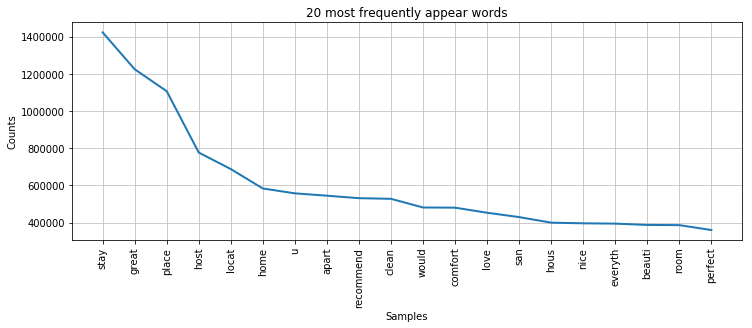

In [102]:
plt.figure(figsize=(12,4))
fd.plot(20, title='20 most frequently appear words')

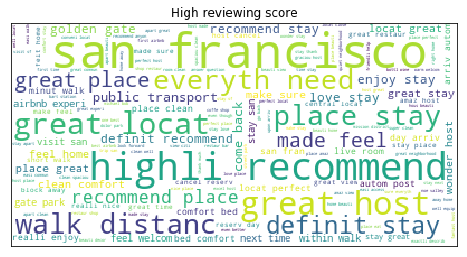

In [105]:
wc = WordCloud(background_color='white,collocations=False').generate(' '.join(words_final))
plt.figure(figsize=(8,8))
plt.xticks([])
plt.yticks([])
plt.imshow(wc)
plt.title('High reviewing score');

From the frequency chart and wordcloud, we can know that transportation and location are important features for tenants. Also, most of the reviews are positive words, which means airbnb in san francisco provide 

#### Low reviewing score

In [97]:
# Convert text to lower case
sf_low['comments'] = sf_low['comments'].map(lambda x: x.lower())

C:\Users\Kathe\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [98]:
# Remove unnecessary punctuation
import string
sf_low['comments']=sf_low['comments'].str.replace('[{}]'.format(string.punctuation), '')

C:\Users\Kathe\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [99]:
words=sf_low['comments'].map(lambda x: regexp_tokenize(x, '[^., ]+'))

In [100]:
words.head()

371553    [everything, was, perfectly, satisfactory, onc...
371554    [do, not, stay, here, apartment, was, filthy, ...
371555    [i, didnt, get, a, chance, to, meet, philip, a...
371556    [the, apartment, is, very, good, clean, beauti...
371557                                        [great, stay]
Name: comments, dtype: object

In [101]:
# remove stopwords
words = [word for word in words if word not in stopwords.words('english')]

In [102]:
words_all=[]
for word_l in words:
    for word in word_l:
        words_all.append(word)


In [103]:
ps = PorterStemmer()
words_all = [ps.stem(word) for word in words_all]
        
lmtzr = WordNetLemmatizer()
words_stem = [lmtzr.lemmatize(word) for word in words_all]

In [104]:
words_final = [word for word in words_stem if word not in stopwords.words('english')]

In [107]:
'that' in words_stem

True

In [110]:
c = Counter(words_final)

In [111]:
fd = FreqDist(Text(words_final))

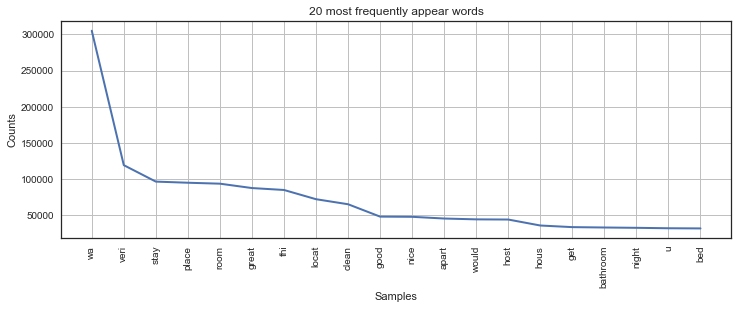

In [112]:
plt.figure(figsize=(12,4))
fd.plot(20, title='20 most frequently appear words')